In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#como hay varias variables que son float, vamos a ajustar a 2 el número de decimales que se muestran por defecto
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print('número de decimales ajustado a dos decimales.')

número de decimales ajustado a dos decimales.


### DATA

In [50]:
# Importo los datos con una funcion de pandas que es read_csv.
# el archivo está dentro de input, y dentro de input, en banco.
# header = 0 es el valor por defecto, y significa que la primera fila, 
# que es la fila 0, es la que contiene los encabecados.
data = pd.read_csv('bank-full.csv', delimiter=";")

In [51]:
#la funcion .shape nos informa del número de filas y de columnas
data_n_filas = data.shape[0]
data_n_columnas = data.shape[1]
print('El conjunto de datos tiene',data_n_columnas, 'columnas y',data_n_filas,'filas' )


El conjunto de datos tiene 17 columnas y 45211 filas


In [52]:
#vamos a ver cuantos valores perdidos hay
# aprovecho para sacar una copia de los datos, para evitar tampering.
data2=data.dropna()
data2_n_columnas = data.shape[0]
data2_n_filas = data.shape[1]
print('El conjunto de datos depurado tiene',data_n_columnas-data2_n_columnas, 'columnas menos y',data_n_filas -data2_n_filas,'filas' )

El conjunto de datos depurado tiene -45194 columnas menos y 45194 filas


In [53]:
# vamos a analizar las variables independientes:
print(list(data2.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [54]:
def analiza(columna, dataset):
    #primero me va a informar de los datos nulos de la columna estudiada
    # isnull() nos dice si hay valores perdidos. Devuelve True o False
    # sum() nos da la suma de determinados valores.
    print('Esta columna tiene:',dataset[columna].isnull().sum(),'datos nulos')
    print('+++++')

        # luego me va a dar unos datos exploratorios.
    print(dataset[columna].describe())
    print('+++++')
    
    # y por ultimo, quiero que me diga las categorias
    #print(pd.value_counts(dataset[columna]))
    print(pd.unique(dataset[columna]))

In [55]:
analiza('age',data2)

Esta columna tiene: 0 datos nulos
+++++
count   45211.00
mean       40.94
std        10.62
min        18.00
25%        33.00
50%        39.00
75%        48.00
max        95.00
Name: age, dtype: float64
+++++
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


In [56]:
analiza('job',data2)

# job es una variable categorica con que separa los tipos de trabajos en 12 valores distintos.

Esta columna tiene: 0 datos nulos
+++++
count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
+++++
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [57]:
analiza('marital',data2)

Esta columna tiene: 0 datos nulos
+++++
count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object
+++++
['married' 'single' 'divorced']


In [58]:
analiza('education',data2)

Esta columna tiene: 0 datos nulos
+++++
count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object
+++++
['tertiary' 'secondary' 'unknown' 'primary']


In [59]:
analiza('default',data2)

# default es si el encuestado ha tenido algún aviso de impago.


Esta columna tiene: 0 datos nulos
+++++
count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object
+++++
['no' 'yes']


In [60]:
analiza('housing',data2)

# housing indica si el encuestado tiene vivienda en propiedad

Esta columna tiene: 0 datos nulos
+++++
count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object
+++++
['yes' 'no']


In [74]:
analiza('duration',data2)


Esta columna tiene: 0 datos nulos
+++++
count   45211.00
mean      258.16
std       257.53
min         0.00
25%       103.00
50%       180.00
75%       319.00
max      4918.00
Name: duration, dtype: float64
+++++
[ 261  151   76 ... 1298 1246 1556]


Duracion de la llamada, en segundos.
Este es un dato peculiar:

si la llamada es dura 0 segundo, el resultado es No siempre.
La duracion de la llamada no se puede saber antes de hacerla, de modo que no se puede usar como predictor de exito. Por tanto, no se debería incluir si lo que se pretende es tener un modelo predictivo realista.

### Preparación de Variables

In [75]:
# Explicación de dato

# a ver cuanta gente se suscribió a ese producto
data2['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [76]:
# vamos a verlo en un gráfico
import matplotlib.pyplot as plt
plt.rc('font', size=14)

import seaborn as sns

# configuro colores
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

C:\Users\mauri\AppData\Local\Temp\ipykernel_16836\57204215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',


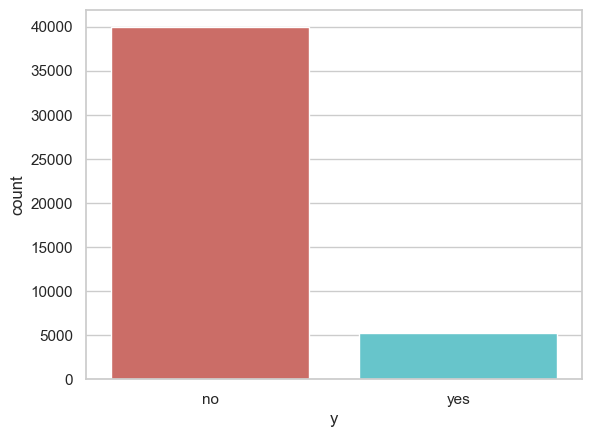

In [77]:
sns.countplot(x='y', 
             data = data2,
             palette='hls')
plt.show
plt.savefig('count_plot')

Claramente, la muestra está desequilibrada: hay mucha más gente que no se suscribió, lo cual es un problema de cara a entrenar el modelo.

In [80]:
# Seleccionamos solo las columnas numéricas del DataFrame.
numeric_cols = data2.select_dtypes(include=[np.number])


# Ahora realizamos el groupby y calculamos la media solo para esas columnas numéricas.
means_by_y = numeric_cols.groupby(data2['y']).mean()

print(means_by_y)

      age  balance   day  duration  campaign  pdays  previous
y                                                            
no  40.84  1303.71 15.89    221.18      2.85  36.42      0.50
yes 41.67  1804.27 15.16    537.29      2.14  68.70      1.17


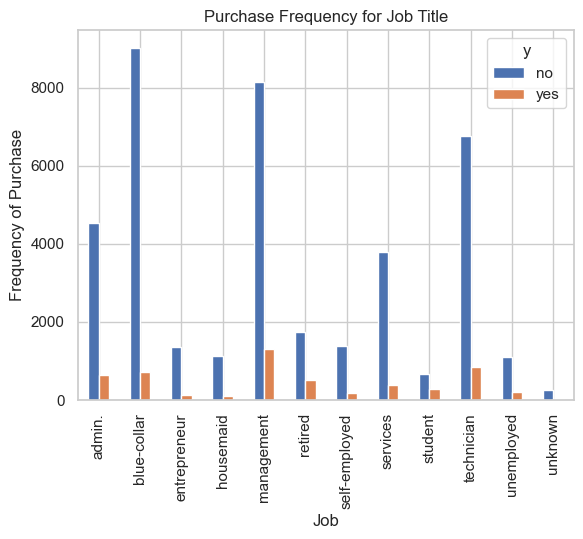

In [82]:
tabla_cruzada_job = pd.crosstab(data2.job,data2.y)

# a ver, esto es nuevo.
# Matplotlib Inline command is a magic command that makes 
#the plots generated by matplotlib show into the IPython shell 
#that we are running and not in a separate output window.
%matplotlib inline

#esto tambien es interesante: pide una tabla cruzada,
#y le pone .plot detras, y entre parentesis, el tipo de plot
tabla_cruzada_job.plot(kind='bar')

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')